In [1]:
import keras
import numpy as np
from keras.datasets import cifar10
from keras.layers import Dense, Dropout, Activation, Flatten,Input,Multiply
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from skimage import util
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras.models import Model

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_noise_train = np.zeros((50000,32, 32, 3), dtype=np.float) #x_train.shape=(50000,32,32,3)
x_noise_test = np.zeros((10000,32, 32, 3), dtype=np.float) #x_test.shape =(10000,32,32,3)
epochs=80

In [4]:
for i in range(len(x_train)):
    x_noise_train[i] = util.random_noise(x_train[i],mode='speckle')
for i in range(len(x_test)):
    x_noise_test[i] = util.random_noise(x_test[i],mode='speckle')

In [5]:
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [6]:
inputs = Input(shape=(32,32,3))
x = Conv2D(32, kernel_size=(3, 3), padding='same',activation='relu')(inputs)
x = Conv2D(32, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, kernel_size=(3, 3), padding='same',activation='relu')(inputs)
x = Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(10, activation='softmax')(x)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
no_noise_cnn_model=Model(inputs=inputs,outputs = x)

In [8]:
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
no_noise_cnn_model.compile(loss='categorical_crossentropy',
              optimizer = opt,
              metrics=['accuracy'])

In [9]:
no_noise_cnn_model_history=no_noise_cnn_model.fit(x_train,y_train,batch_size=64,epochs=epochs,validation_data=(x_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/80
50000/50000 [==============================] - 170s 3ms/step - loss: 1.6265 - acc: 0.4193 - val_loss: 1.3937 - val_acc: 0.5029
Epoch 2/80
50000/50000 [==============================] - 127s 3ms/step - loss: 1.2895 - acc: 0.5488 - val_loss: 1.2486 - val_acc: 0.5601
Epoch 3/80
50000/50000 [==============================] - 128s 3ms/step - loss: 1.1405 - acc: 0.6017 - val_loss: 1.1428 - val_acc: 0.5957
Epoch 4/80
50000/50000 [==============================] - 126s 3ms/step - loss: 1.0414 - acc: 0.6397 - val_loss: 1.1013 - val_acc: 0.6105
Epoch 5/80
50000/50000 [==============================] - 127s 3ms/step - loss: 0.9651 - acc: 0.6657 - val_loss: 0.9938 - val_acc: 0.6568
Epoch 6/80
50000/50000 [==============================] - 124s 2ms/step - loss: 0.9024 - acc: 0.6874 - val_loss: 1.0375 - val_acc: 0.6449
Epoch 7/80
50000/50000 [==============================] - 124s 2ms/step - 

Epoch 58/80
50000/50000 [==============================] - 124s 2ms/step - loss: 0.1242 - acc: 0.9616 - val_loss: 1.1813 - val_acc: 0.7322
Epoch 59/80
50000/50000 [==============================] - 124s 2ms/step - loss: 0.1252 - acc: 0.9609 - val_loss: 1.0335 - val_acc: 0.7391
Epoch 60/80
50000/50000 [==============================] - 123s 2ms/step - loss: 0.1259 - acc: 0.9623 - val_loss: 0.9898 - val_acc: 0.7270
Epoch 61/80
50000/50000 [==============================] - 124s 2ms/step - loss: 0.1281 - acc: 0.9599 - val_loss: 0.9966 - val_acc: 0.7363
Epoch 62/80
50000/50000 [==============================] - 124s 2ms/step - loss: 0.1291 - acc: 0.9606 - val_loss: 1.3294 - val_acc: 0.7407
Epoch 63/80
50000/50000 [==============================] - 124s 2ms/step - loss: 0.1272 - acc: 0.9606 - val_loss: 1.3979 - val_acc: 0.7440
Epoch 64/80
50000/50000 [==============================] - 123s 2ms/step - loss: 0.1316 - acc: 0.9585 - val_loss: 1.0748 - val_acc: 0.7460
Epoch 65/80
50000/50000 [==

In [10]:
inputs = Input(shape=(32,32,3))
x = Conv2D(32, kernel_size=(3, 3), padding='same',activation='relu')(inputs)
x = Conv2D(32, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, kernel_size=(3, 3), padding='same',activation='relu')(inputs)
x = Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(10, activation='softmax')(x)

In [11]:
noise_cnn_model=Model(inputs=inputs,outputs = x)

In [12]:
noise_cnn_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [13]:
noise_cnn_model_history=noise_cnn_model.fit(x_noise_train,y_train,batch_size=64,epochs=epochs,validation_data=(x_noise_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/80
50000/50000 [==============================] - 126s 3ms/step - loss: 1.6481 - acc: 0.4140 - val_loss: 1.4528 - val_acc: 0.4748
Epoch 2/80
50000/50000 [==============================] - 123s 2ms/step - loss: 1.3139 - acc: 0.5379 - val_loss: 1.2471 - val_acc: 0.5578
Epoch 3/80
50000/50000 [==============================] - 124s 2ms/step - loss: 1.1746 - acc: 0.5889 - val_loss: 1.1754 - val_acc: 0.5900
Epoch 4/80
50000/50000 [==============================] - 125s 3ms/step - loss: 1.0786 - acc: 0.6255 - val_loss: 1.1424 - val_acc: 0.5973
Epoch 5/80
50000/50000 [==============================] - 126s 3ms/step - loss: 1.0066 - acc: 0.6500 - val_loss: 1.1307 - val_acc: 0.6050
Epoch 6/80
50000/50000 [==============================] - 125s 2ms/step - loss: 0.9438 - acc: 0.6734 - val_loss: 1.0240 - val_acc: 0.6409
Epoch 7/80
50000/50000 [==============================] - 124s 2ms/step - loss: 0.8892 - acc: 0.6922 - val_loss: 0.9686 - 

In [14]:
inputs = Input(shape=(32,32,3))
r1 = Conv2D(32, kernel_size=(3, 3), padding='same',activation='relu')(inputs)
r2 = Conv2D(32, kernel_size=(3, 3), padding='same',activation='relu')(inputs)
r = Multiply()([r1,r2])
x = Conv2D(32, kernel_size=(3, 3), activation='relu')(r)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, kernel_size=(3, 3), padding='same',activation='relu')(inputs)
x = Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(10, activation='softmax')(x)

In [15]:
noise_rcnn_model=Model(inputs=inputs,outputs = x)

In [16]:
noise_rcnn_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [17]:
noise_rcnn_model_history=noise_rcnn_model.fit(x_noise_train,y_train,batch_size=64,epochs=epochs,validation_data=(x_noise_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/80
50000/50000 [==============================] - 125s 2ms/step - loss: 1.6640 - acc: 0.4057 - val_loss: 1.4516 - val_acc: 0.4782
Epoch 2/80
50000/50000 [==============================] - 124s 2ms/step - loss: 1.3338 - acc: 0.5315 - val_loss: 1.2536 - val_acc: 0.5586
Epoch 3/80
50000/50000 [==============================] - 126s 3ms/step - loss: 1.1927 - acc: 0.5843 - val_loss: 1.2177 - val_acc: 0.5713
Epoch 4/80
50000/50000 [==============================] - 124s 2ms/step - loss: 1.0963 - acc: 0.6200 - val_loss: 1.1258 - val_acc: 0.6068
Epoch 5/80
50000/50000 [==============================] - 123s 2ms/step - loss: 1.0236 - acc: 0.6430 - val_loss: 1.0355 - val_acc: 0.6426
Epoch 6/80
50000/50000 [==============================] - 123s 2ms/step - loss: 0.9628 - acc: 0.6659 - val_loss: 1.0435 - val_acc: 0.6347
Epoch 7/80
50000/50000 [==============================] - 124s 2ms/step - loss: 0.9112 - acc: 0.6855 - val_loss: 0.9991 - 

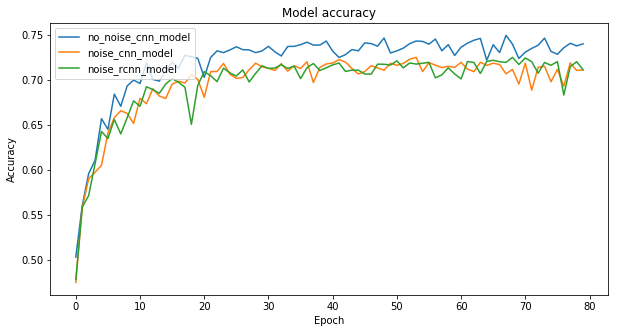

In [26]:
import matplotlib.pyplot as plt
plt.plot(no_noise_cnn_model_history.history['val_acc'])
plt.plot(noise_cnn_model_history.history['val_acc'])
plt.plot(noise_rcnn_model_history.history['val_acc'])
plt.rcParams['figure.figsize'] = (12.0, 5.0)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['no_noise_cnn_model', 'noise_cnn_model','noise_rcnn_model'], loc='upper left')
plt.show()

In [ ]:
plt.plot(no_noise_cnn_model_history.history['val_loss'])
plt.plot(noise_cnn_model_history.history['val_loss'])
plt.plot(noise_rcnn_model_history.history['val_loss'])
plt.rcParams['figure.figsize'] = (12.0, 5.0)
plt.title('Model loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['no_noise_cnn_model', 'noise_cnn_model','noise_rcnn_model'], loc='upper left')
plt.show()

In [ ]:
cnn_model_history.history['val_acc'][20:21]